# <span style='font-family:montserrat;color:#0A043C'>Twitter Sentiment Analysis</span>

### <span style='font-family:montserrat;color:#C84B31'>Project by Kalpana Kashyap</span>

In [57]:
# utilities
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import re
from textblob import TextBlob
from wordcloud import WordCloud

In [58]:
# Importing the dataset
df = pd.read_csv('tweets_data.csv')
df.head()

,Unnamed: 0,id,label,tweet
0,0,1,0,@user when a father is dysfunctional and is s...
1,1,2,0,@user @user thanks for #lyft credit i can't us...
2,2,3,0,bihday your majesty
3,3,4,0,#model i love u take with u all the time in ...
4,4,5,0,factsguide: society now #motivation


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31962 non-null  int64 
 1   id          31962 non-null  int64 
 2   label       31962 non-null  int64 
 3   tweet       31962 non-null  object
dtypes: int64(3), object(1)
memory usage: 998.9+ KB


In [60]:
df.shape

(31962, 4)

In [61]:
# as data is very big, it will take a lot of time to do analysis so I have sliced it to only 1000 tweets
# method is same for any number of tweets
df = df[:1000]

In [62]:
df.shape

(1000, 4)

In [63]:
# clean data
def clean_tweet(text):
    text = re.sub(r'@[a-zA-Z0-9]+','', text) # remove @
    text = re.sub(r'#','', text) # remove # hanshtag
    text = re.sub(r'RT[\s]+','', text) # remove RT
    text = re.sub(r'https?:\/\/\S+','', text) # remove hyperlinks
    return text

In [64]:
df['clean_tweet'] = df ['tweet'].apply(clean_tweet)

In [65]:
df.head()

,Unnamed: 0,id,label,tweet,clean_tweet
0,0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause the...
2,2,3,0,bihday your majesty,bihday your majesty
3,3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,4,5,0,factsguide: society now #motivation,factsguide: society now motivation


In [66]:
# to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [67]:
# to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [68]:
df['Subjectivity'] = df['tweet'].apply(getSubjectivity)
df['Polarity'] = df['tweet'].apply(getPolarity)

In [69]:
df.head()

,Unnamed: 0,id,label,tweet,clean_tweet,Subjectivity,Polarity
0,0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,1.0,-0.500000
1,1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause the...,0.2,0.200000
2,2,3,0,bihday your majesty,bihday your majesty,0.0,0.000000
3,3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,0.6,0.976562
4,4,5,0,factsguide: society now #motivation,factsguide: society now motivation,0.0,0.000000


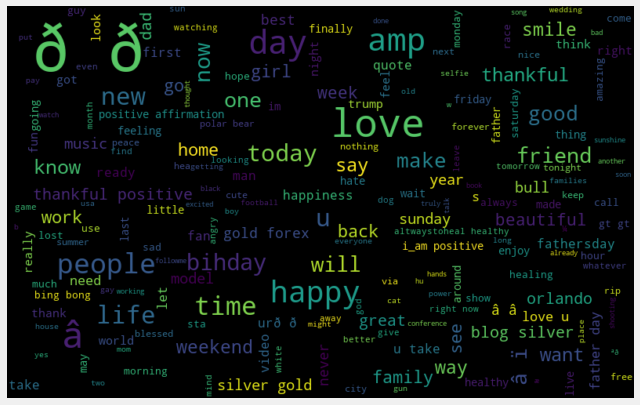

In [70]:
# displaying wordcloud
all_words = " ".join([sentence for sentence in df['clean_tweet']])
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=80).generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [71]:
# compute the negative, neautral and positive analysis
def sent_analysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [72]:
df['Analysis'] = df['Polarity'].apply(sent_analysis)

In [73]:
df.head()

,Unnamed: 0,id,label,tweet,clean_tweet,Subjectivity,Polarity,Analysis
0,0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,1.0,-0.500000,Negative
1,1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause the...,0.2,0.200000,Positive
2,2,3,0,bihday your majesty,bihday your majesty,0.0,0.000000,Neutral
3,3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,0.6,0.976562,Positive
4,4,5,0,factsguide: society now #motivation,factsguide: society now motivation,0.0,0.000000,Neutral


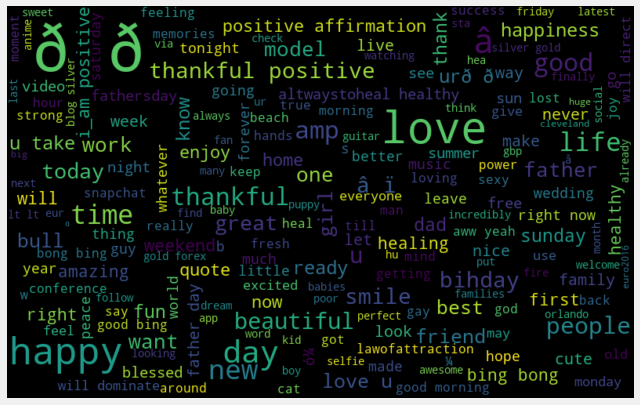

In [74]:
# displaying wordcloud for positive tweets i.e Analysis == Positive
all_positive = " ".join([sentence for sentence in df['clean_tweet'][df['Analysis']=='Positive']])
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=80).generate(all_positive)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

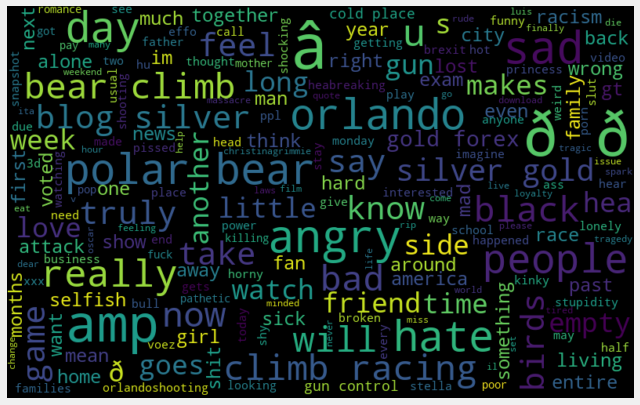

In [75]:
# displaying wordcloud for negative tweets i.e Analysis == negative
all_negative = " ".join([sentence for sentence in df['clean_tweet'][df['Analysis']=='Negative']])
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=80).generate(all_negative)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

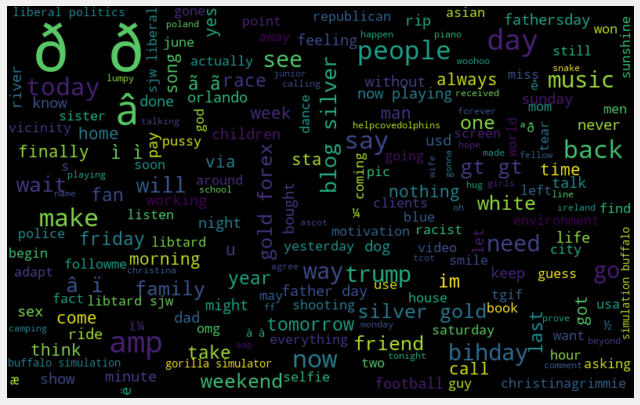

In [76]:
# displaying wordcloud for neutral tweets i.e Analysis == neutral
all_neutral = " ".join([sentence for sentence in df['clean_tweet'][df['Analysis']=='Neutral']])
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=80).generate(all_neutral)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [77]:
# print positive tweets by popularity
j=1
popularity_df = df.sort_values(by=['Polarity'])
for i in range(0, popularity_df.shape[0]):
    if(popularity_df['Analysis'][i]=='Positive'):
        print(str(j) + ') ' + popularity_df['clean_tweet'][i] + "\n")
        j=j+1


1)   thanks for lyft credit i can't use cause they don't offer wheelchair vans in pdx.    disapointed getthanked

2) model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  

3) [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. allshowandnogo  

4) we won!!! love the land!!! allin cavs champions cleveland clevelandcavaliers  â¦ 

5)    welcome here !  i'm   it's so gr8 ! 

6) i am thankful for having a paner. thankful positive     

7) euro2016 people blaming ha for conceded goal was it fat rooney who gave away free kick knowing bale can hit them from there.  

8) product of the day: happy man wine tool  who's   it's the weekend? time to open up &amp; drink up!

9) beautiful sign by vendor 80 for $45.00!! upsideofflorida shopalyssas   love 

10)   all smiles when media is   !! ðð pressconference in antalya turkey ! sunday throwback  love! ððâ¤ï¸ 

11) we had a great panel on the mediatization o

In [78]:
# print negative tweets by popularity
j=1
popularity_df = df.sort_values(by=['Polarity'])
for i in range(0, popularity_df.shape[0]):
    if(popularity_df['Analysis'][i]=='Negative'):
        print(str(j) + ') ' + popularity_df['clean_tweet'][i] + "\n")
        j=j+1


1)   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   run

2) the next school year is the year for exams.ð¯ can't think about that ð­ school exams   hate imagine actorslife revolutionschool girl

3)  â ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   blog silver gold forex

4) we are so selfish. orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking   values love 

5) sad little dude..   badday coneofshame cats pissed funny laughs 

6) it was a hard monday due to cloudy weather. disabling oxygen production for today. goodnight badmonday  

7) it's unbelievable that in the 21st century we'd need something like this. again. neverump  xenophobia 

8) yup, being a knicks fan is hard, so its easier to just be an nba fan when the playoffs roll around ð 

9) whenever im   and something goes wrong  |  

10) you've really hu my feelings :(  

11) carrying a gun wouldn't of helped 

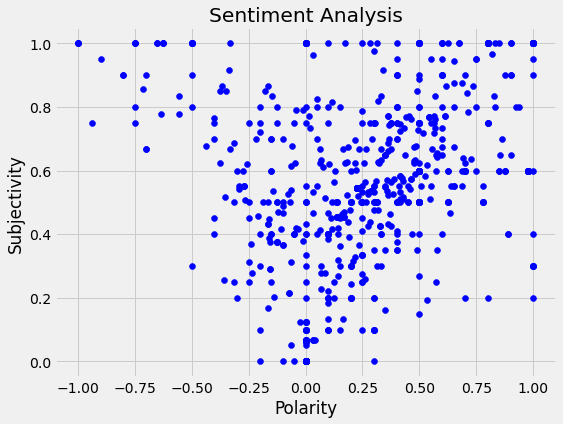

In [79]:
# plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [80]:
# percentage of positive tweets
positive_tweets = df[df.Analysis == 'Positive']
positive_tweets = positive_tweets['clean_tweet']

round((positive_tweets.shape[0] / df.shape[0]) * 100, 1)

51.3

In [81]:
# percentage of negative tweets
negative_tweets = df[df.Analysis == 'Negative']
negative_tweets = negative_tweets['clean_tweet']

round((negative_tweets.shape[0] / df.shape[0]) * 100, 1)

13.9

In [82]:
# percentage of neutral tweets
neutral_tweets = df[df.Analysis == 'Neutral']
neutral_tweets = neutral_tweets['clean_tweet']

round((neutral_tweets.shape[0] / df.shape[0]) * 100, 1)

34.8

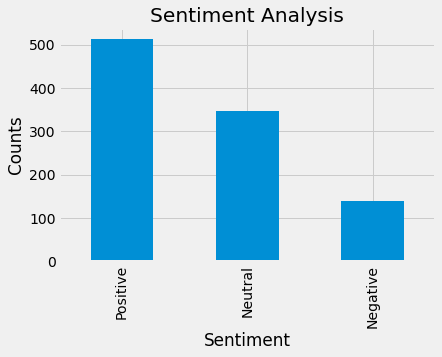

In [83]:
# value counts and visualization
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [84]:
df.head()

,Unnamed: 0,id,label,tweet,clean_tweet,Subjectivity,Polarity,Analysis
0,0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,1.0,-0.500000,Negative
1,1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause the...,0.2,0.200000,Positive
2,2,3,0,bihday your majesty,bihday your majesty,0.0,0.000000,Neutral
3,3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,0.6,0.976562,Positive
4,4,5,0,factsguide: society now #motivation,factsguide: society now motivation,0.0,0.000000,Neutral


In [85]:
# feature extraction
# based on label 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [86]:
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print("f1_score: ", f1_score(y_test, pred))
print("Accuracy: ", accuracy_score(y_test, pred))

f1_score:  0.24
Accuracy:  0.924
